# EDA San Francisco Crime Data

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [147]:
data = pd.read_csv('./data/sf_crime/train.csv')
categorycal_cols = ['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address']
for category in categorycal_cols:
    data[category] = data[category].astype('category')
data['Dates'] = pd.to_datetime(data['Dates']) # format=

data.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


In [148]:
data.count()

Dates         878049
Category      878049
Descript      878049
DayOfWeek     878049
PdDistrict    878049
Resolution    878049
Address       878049
X             878049
Y             878049
dtype: int64

In [149]:
# Рассмотрим количество преступлений разных типов
data['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [150]:
data.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [151]:
# Исследуем сколько записей содержат странные значения координат (x = -120.5)
strange_coords_count = sum(data['X'] == -120.5)
normal_coords_count = sum(data['X'] != -120.5)
print('records with strange coords: {0}'.format(strange_coords_count)) # 67
print('records with normal coords: {0}'.format(normal_coords_count))   # 877982

# Записей со странными координатами незначительное количество, похоже их можно просто выкинуть.
# Но сначала следует отдельно их исследовать.

records with strange coords: 67
records with normal coords: 877982


In [152]:
# Рассмотрим преступления типы преступлений со странными коорданатами
strange_records = data[data['X'] <  -120.5]
strange_records['Category'].value_counts()

# Доминируеют два типа преутсплений: OTHER OFFENSES и LARCENY/THEFT.
# Похоже эти записи действительно можно просты выкинуть, т.к. порядок преступлений примерно совпадает с общей выборкой.

LARCENY/THEFT                  174885
OTHER OFFENSES                 126165
NON-CRIMINAL                    92300
ASSAULT                         76872
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53772
VANDALISM                       44724
WARRANTS                        42206
BURGLARY                        36754
SUSPICIOUS OCC                  31412
MISSING PERSON                  25989
ROBBERY                         22999
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7325
STOLEN PROPERTY                  4539
SEX OFFENSES FORCIBLE            4387
DISORDERLY CONDUCT               4318
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [153]:
# Выкинем данные со странным координатами
data = data[data['X'] < -120.5]

# Для тестов возьмем координаты и тип преступлений
X = data[['Category', 'X', 'Y']]
x_coords, y_coords, category = data['X'].copy(), data['Y'].copy(), data['Category']

ind = 0
category_index = {}
for item in category.unique():
    if item not in category_index:
        category_index[item] = ind
        ind += 1
        
category_colors = category.apply(lambda item: category_index[item])

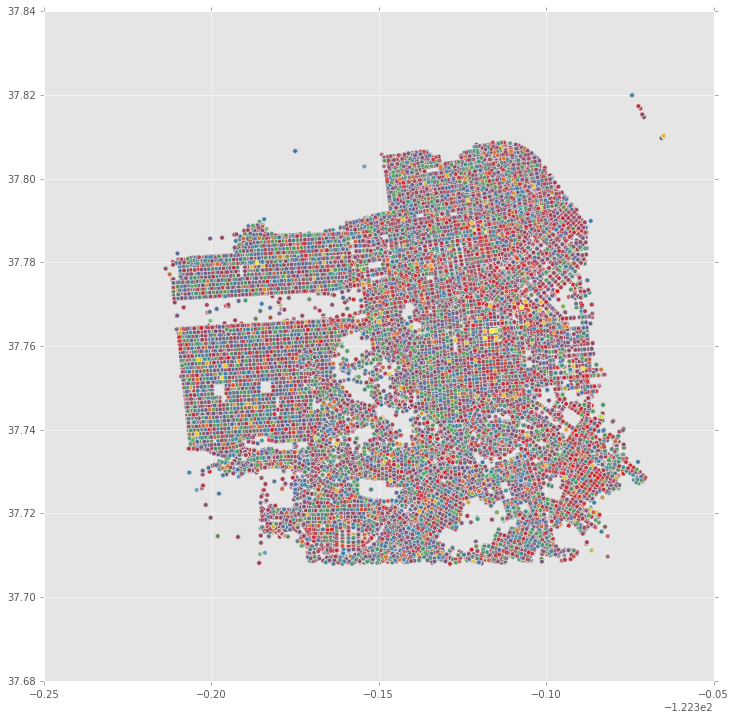

In [154]:
plt.figure(figsize=(12, 12))
plt.scatter(x_coords, y_coords, c=category_colors, cmap='Set1', alpha=0.7)
plt.show()

Многие группы преступлений локализованы, возможно имеет смысл собирать кластеры.
Как вариант можно попробовать SVM c rbf kernel.

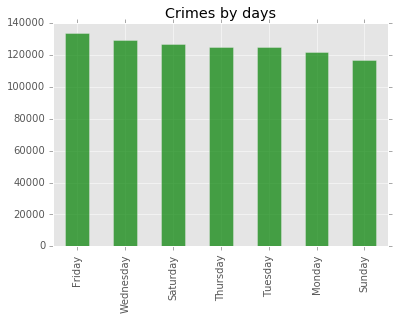

In [155]:
data['DayOfWeek'].value_counts().plot(kind='bar', title='Crimes by days',
                                      color='green', alpha=0.7)

Больше всего преступлений совершалось в *пятницу*, меньше всего в *субботу*.

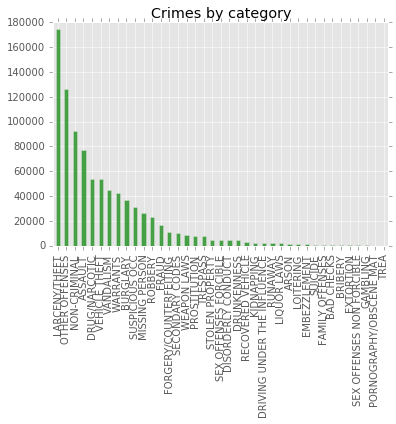

In [156]:
data['Category'].value_counts().plot(kind='bar', title='Crimes by category', color='green', alpha=0.7)
plt.show()

Примерно 1/5 часть типов преступлений совершается незначительное количество раз. Возможно их стоит выкинуть из рассмотрения.

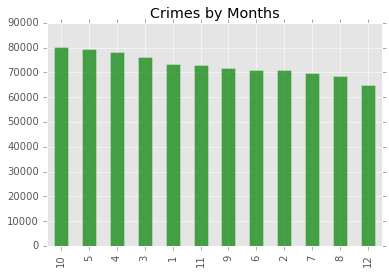

In [157]:
data['Dates'].apply(lambda i: i.month).value_counts().plot(kind='bar', title='Crimes by Months', color='green', alpha=0.7)
plt.show()

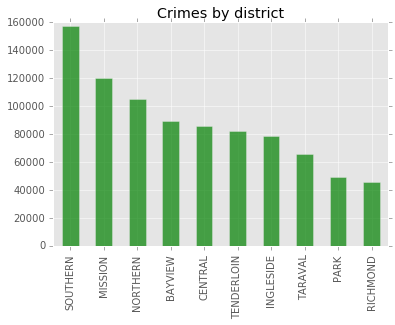

In [158]:
data['PdDistrict'].value_counts().plot(kind='bar', title='Crimes by district', color='green', alpha=0.7)
plt.show()

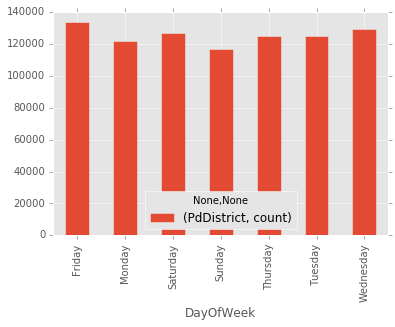

In [159]:
d = data[['PdDistrict',  'DayOfWeek']].groupby(['DayOfWeek'])
d.agg(['count']).plot(kind='bar')
plt.show()

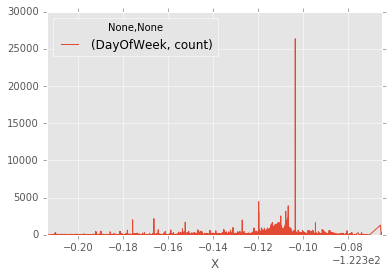

In [160]:
dx = data[['X',  'DayOfWeek']].groupby(['X'])
dx.agg(['count']).plot()
plt.show()

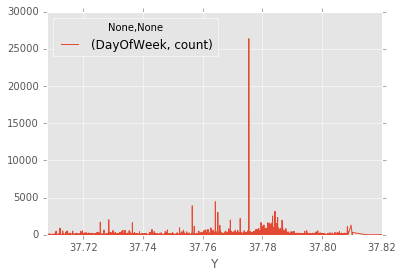

In [161]:
dy = data[['Y',  'DayOfWeek']].groupby(['Y'])
dy.agg(['count']).plot()
plt.show()

А вот это уже забавно. Количество преступлений коррелирует с широтой и долготой. Вероятно это связано с тем, что улицы в городе параллельны.

И по широте и по долготе наблюдаются по одному огромному выбросу.
Стоит исследовать откуда он взялся и что из себя представляет.

In [162]:
dx = data[['X',  'DayOfWeek']].groupby(['X'])
crimes_by_x = dx.count()
print (type(crimes_by_x))
print (crimes_by_x.columns)
crimes_by_x.sort_values('DayOfWeek', ascending=False).head(5)

<class 'pandas.core.frame.DataFrame'>
Index([u'DayOfWeek'], dtype='object')


,DayOfWeek
X,
-122.403405,26354
-122.419658,4449
-122.406539,3891
-122.407634,3170
-122.419672,3006


In [163]:
dy = data[['Y',  'DayOfWeek']].groupby(['Y'])
crimes_by_y = dy.count()
crimes_by_y.sort_values('DayOfWeek', ascending=False).head(5)

,DayOfWeek
Y,
37.775421,26354
37.764221,4449
37.756486,3891
37.784189,3170
37.765050,3006


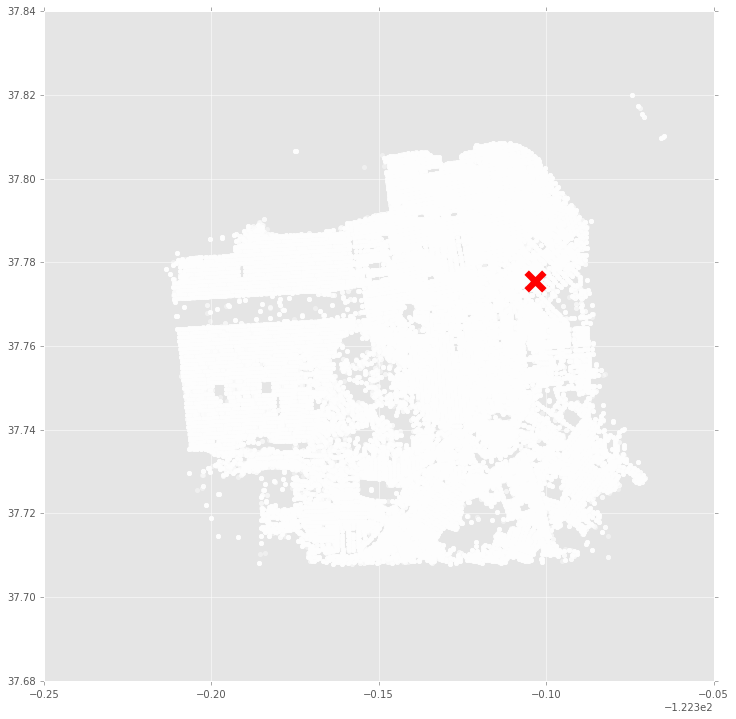

In [181]:
plt.figure(figsize=(12, 12))
plt.scatter(x_coords, y_coords, color='white', alpha=0.4)
plt.scatter([-122.403405], [37.775421], color='red', linewidths=25, marker='x')
plt.show()

Преступления с координатой *$(-122.403405:37.775421)$* встречаются *26354* что в 5 раз чаще, чем любые другие преступления. Исследуем данные преступления подробнее.

In [165]:
eps = 0.000001

# Точное равенство не позволяет выбрать преступления, приходится использовать eps
strange_crimes = data[np.abs(data['X'] -(-122.403405)) < eps]
print("Strange crime count: {0}".format(len(strange_crimes)))
strange_crimes['Category'].value_counts()

Strange crime count: 26354


LARCENY/THEFT                  6122
NON-CRIMINAL                   5549
OTHER OFFENSES                 2994
ASSAULT                        1906
WARRANTS                       1711
SUSPICIOUS OCC                 1143
VANDALISM                      1141
FRAUD                           936
DRUG/NARCOTIC                   778
MISSING PERSON                  772
FORGERY/COUNTERFEITING          611
ROBBERY                         590
BURGLARY                        381
SECONDARY CODES                 307
SEX OFFENSES FORCIBLE           296
WEAPON LAWS                     155
TRESPASS                        147
VEHICLE THEFT                   123
DRUNKENNESS                      98
KIDNAPPING                       97
STOLEN PROPERTY                  93
DISORDERLY CONDUCT               75
PROSTITUTION                     55
ARSON                            41
DRIVING UNDER THE INFLUENCE      40
RUNAWAY                          36
LIQUOR LAWS                      29
EMBEZZLEMENT                

## Другие размышления и тесты

In [166]:
# dx_as = data[data['Category'] == 'WARRANTS'][['X', 'Category']].groupby(['X'])
# dx_wa = data[data['Category'] == 'ASSAULT'][['X', 'Category']].groupby(['X'])

# dx_as = dx_as.count()
# dx_wa = dx_wa.count()

# plt.scatter(dx_as.index, dx_as.values, alpha=0.1, color='green')
# plt.scatter(dx_wa.index, dx_wa.values, alpha=0.1, color='red')

# plt.show()

Похоже на разной долготе разные преступления более популярны.

In [167]:
# days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# for day in days:
#     data[data['DayOfWeek']==day]['PdDistrict'].value_counts()\
#         .plot(kind='bar', title='Crimes by district on %s' % day, color='green', alpha=0.2)
#     plt.show()

In [168]:
# Попытка выделить дороги по координатам
# road_border = 25
# dx = data[['X',  'DayOfWeek']].groupby(['X'])
# d = dx.count()
# road_coords = d[d > road_border].dropna()
# X_road_indexes = data['X'].isin(road_coords.index)

# dx = data[['Y',  'DayOfWeek']].groupby(['Y'])
# d = dx.count()
# road_coords = d[d > road_border].dropna()
# Y_road_indexes = data['Y'].isin(road_coords.index)

In [169]:
# Выберем из данных координаты и категории для дальнейших построений
# X = data[X_road_indexes][['Category', 'X', 'Y']]
# x_coords, y_coords, category = data[X_road_indexes]['X'].copy(), data[Y_road_indexes]['Y'].copy(), data[Y_road_indexes]['Category']

# # Для наглядности
# x_coords += 122.
# y_coords -= 37

# ind = 0
# category_index = {}
# for item in category.unique():
#     if item not in category_index:
#         category_index[item] = ind
#         ind += 1
        
# category_colors = category.apply(lambda item: category_index[item])

# plt.figure(figsize=(12, 12))
# plt.scatter(x_coords, y_coords, c=category_colors, cmap='Set1', alpha=0.7)
# plt.show()